In [1]:
import pyNUISANCE as pn
import pyNuHepMC as nhm

In [2]:
evs = pn.EventSource("dune_argon_sf_10mega.nuwro.pb.gz")
if not evs:
    print("Error: failed to open input file")

[2024-02-29 00:10:32.955] [info] Found eventinput plugin: /root/software/NUISANCEMC/eventinput/build/Linux/lib/plugins/nuisplugin-eventinput-GHEP3.so
[2024-02-29 00:10:33.002] [info] Found eventinput plugin: /root/software/NUISANCEMC/eventinput/build/Linux/lib/plugins/nuisplugin-eventinput-NuWroevent1.so
[2024-02-29 00:10:33.010] [info] Found eventinput plugin: /root/software/NUISANCEMC/eventinput/build/Linux/lib/plugins/nuisplugin-eventinput-neutvect.so
[2024-02-29 00:10:33.013] [info] EventSourceFactory: PathResolver::resolve filepath: dune_argon_sf_10mega.nuwro.pb.gz, exists: true
[2024-02-29 00:10:33.300] [info] Reading file dune_argon_sf_10mega.nuwro.pb.gz with native HepMC3EventSource


In [3]:
def enu_GeV(ev):
    return nhm.EventUtils.GetBeamParticle(ev).momentum().e() * nhm.EventUtils.ToMeVFactor(ev) * 1E-3
print(enu_GeV(evs.first()[0]))

2.2748704837946896


In [50]:
wfact = pn.WeightCalcFactory()

wt2k = wfact.make(evs,{"plugin_name":"Prob3plusplus"})
wt2k.set_parameters({"baseline:t2k": 1, "bestfit:t2k": 1})

wnufit = wfact.make(evs,{"plugin_name":"Prob3plusplus"})
wnufit.set_parameters({
    "sinsq_th12": 0.303, 
    "sinsq_th23": 0.572,
    "sinsq_th13": 0.02203, 
    "dmsq_21":7.41E-5,
    "dmsq_atm": 2.51E-3,
    "baseline_km":1300})

[2024-02-29 00:27:24.837] [info] Found weightcalc plugin: /root/software/NUISANCEMC/eventinput/build/Linux/lib/plugins/nuisplugin-weightcalc-GENIEReWeight.so
[2024-02-29 00:27:24.839] [info] Found weightcalc plugin: /root/software/NUISANCEMC/eventinput/build/Linux/lib/plugins/nuisplugin-weightcalc-NReWeight.so
[2024-02-29 00:27:24.839] [info] Found weightcalc plugin: /root/software/NUISANCEMC/eventinput/build/Linux/lib/plugins/nuisplugin-weightcalc-Prob3plusplus.so
[2024-02-29 00:27:24.841] [info] [Prob3plusplusWeightCalc]: Set baseline_km = 295
[2024-02-29 00:27:24.841] [info] [Prob3plusplusWeightCalc]: Set t2k baseline
[2024-02-29 00:27:24.841] [info] [Prob3plusplusWeightCalc]: Set sinsq_th12 = 0.297
[2024-02-29 00:27:24.841] [info] [Prob3plusplusWeightCalc]: Set sinsq_th13 = 0.0214
[2024-02-29 00:27:24.841] [info] [Prob3plusplusWeightCalc]: Set sinsq_th23 = 0.526
[2024-02-29 00:27:24.841] [info] [Prob3plusplusWeightCalc]: Set dmsq_21 = 7.37e-05
[2024-02-29 00:27:24.841] [info] [Prob

In [51]:
print(pn.FrameGen(evs).limit(20).add_column("enu_GeV",enu_GeV).add_column("NuFit 5.2",wnufit).add_column("T2K BF",wt2k).all())

 -------------------------------------------
 | evt# | cvw | enu_GeV |   pprob |  pprob |
 -------------------------------------------
 |    0 |   1 |   2.275 | 0.08036 | 0.8412 |
 |    1 |   1 |    14.3 |  0.9179 | 0.9958 |
 |    2 |   1 |    2.86 | 0.02232 | 0.8974 |
 |    3 |   1 |   3.728 |  0.1972 | 0.9387 |
 |    4 |   1 |    9.08 |  0.8047 | 0.9895 |
 |    5 |   1 |   3.237 | 0.08565 | 0.9193 |
 |    6 |   1 |   2.473 | 0.02523 | 0.8644 |
 |    7 |   1 |   1.916 |  0.3381 | 0.7813 |
 |    8 |   1 |   1.988 |  0.2673 | 0.7956 |
 |    9 |   1 |   3.671 |  0.1839 | 0.9369 |
 |   10 |   1 |   2.506 | 0.02038 | 0.8678 |
 |   11 |   1 |    2.55 | 0.01559 | 0.8721 |
 |   12 |   1 |   2.242 | 0.09475 | 0.8367 |
 |   13 |   1 |    3.36 |  0.1122 | 0.9249 |
 |   14 |   1 |   2.785 | 0.01546 |  0.892 |
 |   15 |   1 |   2.682 | 0.01091 | 0.8839 |
 |   16 |   1 |   1.237 |  0.9413 | 0.5317 |
 |   17 |   1 |   10.46 |  0.8503 | 0.9921 |
 |   18 |   1 |   3.034 | 0.04687 | 0.9085 |
 |   19 | 

In [52]:
binning = pn.binning.lin_space(50,0,5, "E_nu [GeV]")
hfo = pn.HistFrame(binning) #the default first column name is "mc"
hf = pn.HistFrame(binning) #the default first column name is "mc"
for i, (ev, cvw) in enumerate(evs):
    hfo.fill(enu_GeV(ev),cvw*wnufit(ev))
    hf.fill(enu_GeV(ev),cvw)
    if i >= 1E6:
        break
print(hf)

 ---------------------
 |        mc |   err |
 ---------------------
 |         0 |     0 |
 |        31 | 5.568 |
 |       281 | 16.76 |
 |       812 |  28.5 |
 |      1436 | 37.89 |
 |      2835 | 53.24 |
 |      4309 | 65.64 |
 |      5788 | 76.08 |
 |      7648 | 87.45 |
 |      9346 | 96.67 |
 | 1.113e+04 | 105.5 |
 | 1.304e+04 | 114.2 |
 | 1.418e+04 | 119.1 |
 | 1.551e+04 | 124.5 |
 | 1.634e+04 | 127.8 |
 | 1.823e+04 |   135 |
 | 2.018e+04 | 142.1 |
 | 2.227e+04 | 149.2 |
 | 2.364e+04 | 153.7 |
 | 2.594e+04 | 161.1 |
 |  2.74e+04 | 165.5 |
 |       ... |   ... |
 ---------------------


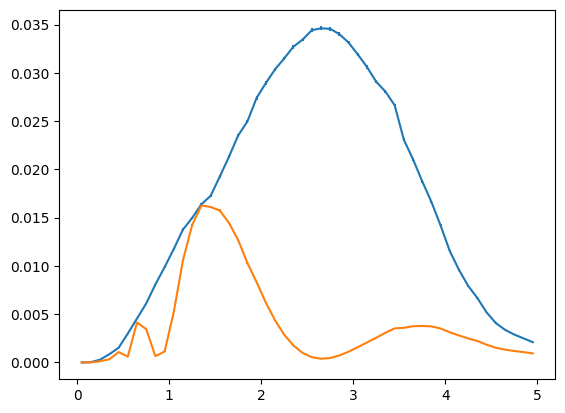

In [54]:
import matplotlib.pyplot as plt
import numpy as np

bin_centers = [ ((x[0].min + x[0].max) / 2.0) for x in hf.binning.bin_info.extents ]
bin_widths = [ (x[0].max - x[0].min) for x in hf.binning.bin_info.extents ]

sf = evs.fatx()/evs.sumw()

plt.errorbar(bin_centers,hf.contents[:,0]*sf,yerr=np.sqrt(hf.variance[:,0])*sf)
plt.errorbar(bin_centers,hfo.contents[:,0]*sf,yerr=np.sqrt(hfo.variance[:,0])*sf)
plt.show()